<a href="https://colab.research.google.com/github/nika-va/ML_Classification_comparison/blob/main/Classification_Algorithms_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# main libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# dataset preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# from category_encoders.hashing import HashingEncoder

In [9]:
# import algorithms
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [10]:
# metrics
from sklearn.metrics import accuracy_score, \
                            precision_score, \
                            recall_score, \
                            f1_score

In [11]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('/content/Titanic Dataset.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [13]:
df.drop(columns=['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], inplace=True)

In [14]:
df = pd.get_dummies(df)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   age         1046 non-null   float64
 3   sibsp       1309 non-null   int64  
 4   parch       1309 non-null   int64  
 5   fare        1308 non-null   float64
 6   sex_female  1309 non-null   bool   
 7   sex_male    1309 non-null   bool   
 8   embarked_C  1309 non-null   bool   
 9   embarked_Q  1309 non-null   bool   
 10  embarked_S  1309 non-null   bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 67.9 KB


(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

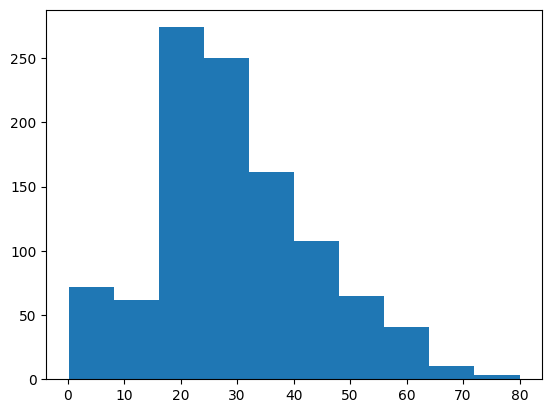

In [16]:
plt.hist(df['age'])

In [17]:
df['age'].fillna(round(df['age'].mean(), 2), inplace=True)

In [18]:
df.dropna(subset= ['fare'], inplace=True)

In [19]:
df.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,29.00,0,0,211.3375,True,False,False,False,True
1,1,1,0.92,1,2,151.5500,False,True,False,False,True
2,1,0,2.00,1,2,151.5500,True,False,False,False,True
3,1,0,30.00,1,2,151.5500,False,True,False,False,True
4,1,0,25.00,1,2,151.5500,True,False,False,False,True


In [20]:
X = df.drop(['survived'], axis=1)
y = df['survived']

In [21]:
scaler = preprocessing.StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [23]:
X_tr_scaled, X_te_scaled, y_tr, y_te = train_test_split(X_scaled, y, test_size=0.2, shuffle=True)

## Feature Importance

In [24]:
# decision tree feature importances
model = DecisionTreeRegressor()
model.fit(X, y)
importance = model.feature_importances_

Feature: 0, Score: 0.10030
Feature: 1, Score: 0.22721
Feature: 2, Score: 0.05847
Feature: 3, Score: 0.01729
Feature: 4, Score: 0.26463
Feature: 5, Score: 0.30448
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00810
Feature: 8, Score: 0.00420
Feature: 9, Score: 0.01532


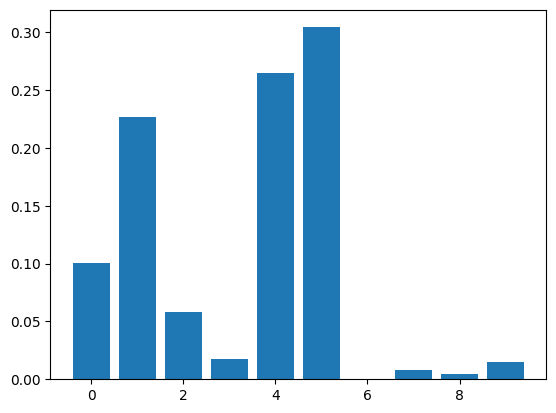

In [25]:
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.19767
Feature: 1, Score: 0.04457
Feature: 2, Score: 0.07392
Feature: 3, Score: 0.03487
Feature: 4, Score: 0.05851
Feature: 5, Score: 0.40906
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.03767
Feature: 8, Score: 0.04376
Feature: 9, Score: 0.09996


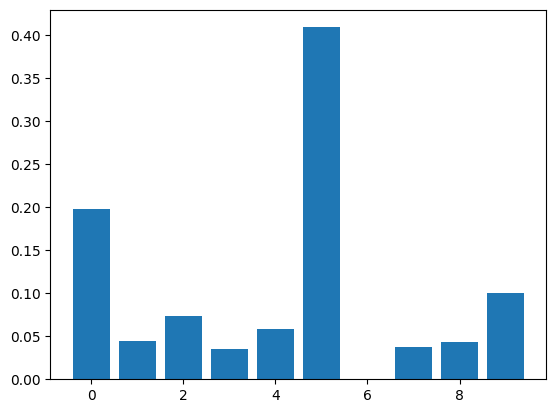

In [26]:
from xgboost import XGBRegressor

# xgboost feature importances
model = XGBRegressor()
model.fit(X, y)
importance = model.feature_importances_

for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [27]:
y_train

722     0
360     1
1222    0
252     0
1209    0
       ..
862     1
281     1
607     1
992     0
143     1
Name: survived, Length: 1046, dtype: int64

In [28]:
X_train.drop(['sex_male'], axis=1, inplace=True)
X_tr_scaled.drop([6], axis=1, inplace=True)

In [29]:
X_test.drop(['sex_male'], axis=1, inplace=True)
X_te_scaled.drop([6], axis=1, inplace=True)

## Algorithms Comparison with cross validation

In [30]:
# Logistic Regression
# Naive Bayes
# KNN
# SVC
# Decision Tree Classifier
# Random Forest Classifier

In [31]:
acc_score = {}
prec_score = {}
rec_score = {}
f1 = {}

In [32]:
acc_score_scaled = {}
prec_score_scaled = {}
rec_score_scaled = {}
f1_scaled = {}

In [33]:
def show_scores():
  print(f'''accuracy score: {acc_score},
precision score: {prec_score},
recall score: {rec_score},
f1 score: {f1}''')

In [34]:
def show_scores_scaled():
  print(f''' SCALED SCORES:
accuracy score: {acc_score_scaled},
precision score: {prec_score_scaled},
recall score: {rec_score_scaled},
f1 score: {f1_scaled}''')

## Logistic Regression

Original Dataset Training

In [35]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [36]:
# accuracy_score(y_pred, y_test)

In [37]:
# grid_result.best_params_

In [38]:
# y_pred = grid_result.predict(X_test)

In [39]:
# accuracy_score(y_pred, y_test)

In [40]:
# # without hyperparameter tuning
# scores = ['accuracy', 'precision', 'recall', 'f1']
# scores_dict = [acc_score, prec_score, rec_score, f1]

# for x, score_dict in zip(scores, scores_dict):
#   score_lr = cross_val_score(logreg, X_test, y_test,cv=5, scoring=x)
#   print('Scoring metric:', x)
#   print(score_lr)
#   print("Avg :",np.average(score_lr))
#   print('\n')
#   score_dict['Logistic Regression'] = np.average(score_lr)

In [41]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [42]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, scoring='f1')
grid_result = grid_search.fit(X_train, y_train)

In [43]:
# with hyperparameter tuning
scores = ['accuracy', 'precision', 'recall', 'f1']
scores_dict = [acc_score, prec_score, rec_score, f1]

for x, score_dict in zip(scores, scores_dict):
  score_lr = cross_val_score(grid_result.best_estimator_, X_test, y_test,cv=5, scoring=x)
  print('Scoring metric:', x)
  print(score_lr)
  print("Avg :",np.average(score_lr))
  print('\n')
  score_dict['Logistic Regression'] = np.average(score_lr)

Scoring metric: accuracy
[0.75471698 0.79245283 0.71153846 0.86538462 0.94230769]
Avg : 0.8132801161103048


Scoring metric: precision
[0.7        0.77777778 0.63157895 0.80952381 0.94736842]
Avg : 0.773249791144528


Scoring metric: recall
[0.66666667 0.66666667 0.6        0.85       0.9       ]
Avg : 0.7366666666666666


Scoring metric: f1
[0.68292683 0.71794872 0.61538462 0.82926829 0.92307692]
Avg : 0.7537210756722953




Scaled Dataset Training

In [44]:
logreg = LogisticRegression()
logreg.fit(X_tr_scaled, y_tr)

LogisticRegression()

In [45]:
# without hyperparameter tuning
# scores = ['accuracy', 'precision', 'recall', 'f1']
# scores_dict = [acc_score_scaled, prec_score_scaled, rec_score_scaled, f1_scaled]

# for x, score_dict in zip(scores, scores_dict):
#   score_lr = cross_val_score(logreg, X_te_scaled, y_te,cv=5, scoring=x)
#   print('Scoring metric:', x)
#   print(score_lr)
#   print("Avg :",np.average(score_lr))
#   print('\n')
#   score_dict['Logistic Regression'] = np.average(score_lr)

In [46]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [47]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, scoring='f1')
grid_result = grid_search.fit(X_tr_scaled, y_tr)

In [48]:
grid_result.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [49]:
# with hyperparameter tuning
scores = ['accuracy', 'precision', 'recall', 'f1']
scores_dict = [acc_score_scaled, prec_score_scaled, rec_score_scaled, f1_scaled]

for x, score_dict in zip(scores, scores_dict):
  score_lr = cross_val_score(grid_result.best_estimator_, X_te_scaled, y_te,cv=5, scoring=x)
  print('Scoring metric:', x)
  print(score_lr)
  print("Avg :",np.average(score_lr))
  print('\n')
  score_dict['Logistic Regression'] = np.average(score_lr)

Scoring metric: accuracy
[0.77358491 0.77358491 0.80769231 0.75       0.75      ]
Avg : 0.7709724238026124


Scoring metric: precision
[0.75       0.9        0.8        0.71428571 0.63636364]
Avg : 0.7601298701298702


Scoring metric: recall
[0.6        0.45       0.63157895 0.52631579 0.73684211]
Avg : 0.5889473684210527


Scoring metric: f1
[0.66666667 0.6        0.70588235 0.60606061 0.68292683]
Avg : 0.6523072909873484




## Naive Bayes

Without Scaling

In [50]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [51]:
# without hyperparameter tuning
scores = ['accuracy', 'precision', 'recall', 'f1']
scores_dict = [acc_score, prec_score, rec_score, f1]

for x, score_dict in zip(scores, scores_dict):
  score_lr = cross_val_score(gnb, X_test, y_test,cv=5, scoring=x)
  print('Scoring metric:', x)
  print(score_lr)
  print("Avg :",np.average(score_lr))
  print('\n')
  score_dict['Naive Bayes'] = np.average(score_lr)

Scoring metric: accuracy
[0.71698113 0.67924528 0.67307692 0.82692308 0.78846154]
Avg : 0.7369375907111756


Scoring metric: precision
[0.6        0.59090909 0.56521739 0.72       0.66666667]
Avg : 0.6285586297760211


Scoring metric: recall
[0.85714286 0.61904762 0.65       0.9        0.9       ]
Avg : 0.7852380952380952


Scoring metric: f1
[0.70588235 0.60465116 0.60465116 0.8        0.76595745]
Avg : 0.6962284250662165




In [52]:
# params_NB = {'var_smoothing': np.logspace(-0,-20, num=50)}

# gs_NB = GridSearchCV(estimator=gnb,
#                      param_grid=params_NB,
#                      verbose=1,
#                      scoring='f1')
# gs_NB.fit(X_train, y_train)

In [53]:
# with hyperparameter tuning
# scores = ['accuracy', 'precision', 'recall', 'f1']
# scores_dict = [acc_score, prec_score, rec_score, f1]

# for x, score_dict in zip(scores, scores_dict):
#   score_lr = cross_val_score(gs_NB.best_estimator_, X_test, y_test,cv=5, scoring=x)
#   print('Scoring metric:', x)
#   print(score_lr)
#   print("Avg :",np.average(score_lr))
#   print('\n')
#   score_dict['Naive Bayes'] = np.average(score_lr)

With Scaling

In [54]:
gnb = GaussianNB()
gnb.fit(X_tr_scaled, y_tr)

GaussianNB()

In [55]:
# without hyperparameter tuning
scores = ['accuracy', 'precision', 'recall', 'f1']
scores_dict = [acc_score_scaled, prec_score_scaled, rec_score_scaled, f1_scaled]

for x, score_dict in zip(scores, scores_dict):
  score_lr = cross_val_score(gnb, X_te_scaled, y_te,cv=5, scoring=x)
  print('Scoring metric:', x)
  print(score_lr)
  print("Avg :",np.average(score_lr))
  print('\n')
  score_dict['Naive Bayes'] = np.average(score_lr)

Scoring metric: accuracy
[0.71698113 0.81132075 0.80769231 0.67307692 0.78846154]
Avg : 0.7595065312046444


Scoring metric: precision
[0.61904762 0.91666667 0.76470588 0.57142857 0.7       ]
Avg : 0.7143697478991596


Scoring metric: recall
[0.65       0.55       0.68421053 0.42105263 0.73684211]
Avg : 0.608421052631579


Scoring metric: f1
[0.63414634 0.6875     0.72222222 0.48484848 0.71794872]
Avg : 0.6493331532965679




In [56]:
# params_NB = {'var_smoothing': np.logspace(10,-20, num=100)}

# gs_NB = GridSearchCV(estimator=gnb,
#                      param_grid=params_NB,
#                      verbose=1,
#                      scoring='f1')
# gs_NB.fit(X_tr_scaled, y_tr)

In [57]:
# with hyperparameter tuning
# scores = ['accuracy', 'precision', 'recall', 'f1']
# scores_dict = [acc_score_scaled, prec_score_scaled, rec_score_scaled, f1_scaled]

# for x, score_dict in zip(scores, scores_dict):
#   score_lr = cross_val_score(gs_NB.best_estimator_, X_te_scaled, y_te,cv=5, scoring=x)
#   print('Scoring metric:', x)
#   print(score_lr)
#   print("Avg :",np.average(score_lr))
#   print('\n')
#   score_dict['Naive Bayes'] = np.average(score_lr)

## KNN


Without Scaling

In [58]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
# # without hyperparameter tuning
# scores = ['accuracy', 'precision', 'recall', 'f1']
# scores_dict = [acc_score, prec_score, rec_score, f1]

# for x, score_dict in zip(scores, scores_dict):
#   score_lr = cross_val_score(knn, X_test, y_test,cv=5, scoring=x)
#   print('Scoring metric:', x)
#   print(score_lr)
#   print("Avg :",np.average(score_lr))
#   print('\n')
#   score_dict['KNeighbors Classifier'] = np.average(score_lr)

In [60]:
parameter={'n_neighbors': np.arange(2, 30, 1)}
knn_cv=GridSearchCV(knn, param_grid=parameter, verbose=1, scoring='accuracy')
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 16}


In [61]:
# with hyperparameter tuning
scores = ['accuracy', 'precision', 'recall', 'f1']
scores_dict = [acc_score, prec_score, rec_score, f1]

for x, score_dict in zip(scores, scores_dict):
  score_lr = cross_val_score(knn_cv, X_test, y_test,cv=5, scoring=x)
  print('Scoring metric:', x)
  print(score_lr)
  print("Avg :",np.average(score_lr))
  print('\n')
  score_dict['KNeighbors Classifier'] = np.average(score_lr)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Scoring metric: accuracy
[0.73584906 0.67924528 0.75       0.67307692 0.71153846]
Avg : 0.7099419448476052


Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Scoring metric: precision
[0.70588235 0.57142857 0.68421053 0.56521739 0.69230769]
Avg : 0.6438093068595154


Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candid

With Scaling

In [62]:
knn = KNeighborsClassifier()
knn.fit(X_tr_scaled, y_tr)

KNeighborsClassifier()

In [63]:
# without hyperparameter tuning
# scores = ['accuracy', 'precision', 'recall', 'f1']
# scores_dict = [acc_score_scaled, prec_score_scaled, rec_score_scaled, f1_scaled]

# for x, score_dict in zip(scores, scores_dict):
#   score_lr = cross_val_score(knn, X_test, y_test,cv=5, scoring=x)
#   print('Scoring metric:', x)
#   print(score_lr)
#   print("Avg :",np.average(score_lr))
#   print('\n')
#   score_dict['KNeighbors Classifier'] = np.average(score_lr)

In [64]:
parameter={'n_neighbors': np.arange(2, 30, 1)}
knn_cv=GridSearchCV(knn, param_grid=parameter, verbose=1, scoring='accuracy')
knn_cv.fit(X_tr_scaled, y_tr)
print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 12}


In [65]:
# with hyperparameter tuning
scores = ['accuracy', 'precision', 'recall', 'f1']
scores_dict = [acc_score_scaled, prec_score_scaled, rec_score_scaled, f1_scaled]

for x, score_dict in zip(scores, scores_dict):
  score_lr = cross_val_score(knn_cv, X_te_scaled, y_te,cv=5, scoring=x)
  print('Scoring metric:', x)
  print(score_lr)
  print("Avg :",np.average(score_lr))
  print('\n')
  score_dict['KNeighbors Classifier'] = np.average(score_lr)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Scoring metric: accuracy
[0.75471698 0.75471698 0.76923077 0.69230769 0.71153846]
Avg : 0.7365021770682147


Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Scoring metric: precision
[0.68421053 0.76923077 0.73333333 0.57142857 0.625     ]
Avg : 0.6766406400616927


Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candid

## SVC

Without Scaling

In [66]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [67]:
scores = ['accuracy', 'precision', 'recall', 'f1']
scores_dict = [acc_score, prec_score, rec_score, f1]

for x, score_dict in zip(scores, scores_dict):
  score_lr = cross_val_score(svc, X_test, y_test,cv=5, scoring=x)
  print('Scoring metric:', x)
  print(score_lr)
  print("Avg :",np.average(score_lr))
  print('\n')
  score_dict['SVC'] = np.average(score_lr)

Scoring metric: accuracy
[0.69811321 0.62264151 0.65384615 0.69230769 0.57692308]
Avg : 0.6487663280116109


Scoring metric: precision
[0.77777778 0.52631579 0.66666667 1.         0.41666667]
Avg : 0.677485380116959


Scoring metric: recall
[0.33333333 0.47619048 0.2        0.2        0.25      ]
Avg : 0.2919047619047619


Scoring metric: f1
[0.46666667 0.5        0.30769231 0.33333333 0.3125    ]
Avg : 0.38403846153846155




In [68]:
# param_grid = {'C': [0.1, 1, 10, 100],
#               'gamma': [1, 0.1, 0.01],
#               'kernel': ['rbf','linear']}
# grid = RandomizedSearchCV(svc,param_grid, n_iter=10)
# grid.fit(X_train,y_train)

In [69]:
# # with hyperparameter tuning
# scores = ['accuracy', 'precision', 'recall', 'f1']
# scores_dict = [acc_score, prec_score, rec_score, f1]

# for x, score_dict in zip(scores, scores_dict):
#   score_lr = cross_val_score(grid, X_test, y_test,cv=5, scoring=x)
#   print('Scoring metric:', x)
#   print(score_lr)
#   print("Avg :",np.average(score_lr))
#   print('\n')
#   score_dict['SVC'] = np.average(score_lr)

With Scaling

In [70]:
svc = SVC()
svc.fit(X_tr_scaled, y_tr)

SVC()

In [71]:
scores = ['accuracy', 'precision', 'recall', 'f1']
scores_dict = [acc_score_scaled, prec_score_scaled, rec_score_scaled, f1_scaled]

for x, score_dict in zip(scores, scores_dict):
  score_lr = cross_val_score(svc, X_te_scaled, y_te,cv=5, scoring=x)
  print('Scoring metric:', x)
  print(score_lr)
  print("Avg :",np.average(score_lr))
  print('\n')
  score_dict['SVC'] = np.average(score_lr)

Scoring metric: accuracy
[0.81132075 0.73584906 0.75       0.73076923 0.78846154]
Avg : 0.7632801161103048


Scoring metric: precision
[0.75       0.8        0.6875     0.61904762 0.72222222]
Avg : 0.7157539682539682


Scoring metric: recall
[0.75       0.4        0.57894737 0.68421053 0.68421053]
Avg : 0.6194736842105263


Scoring metric: f1
[0.75       0.53333333 0.62857143 0.65       0.7027027 ]
Avg : 0.6529214929214928




## Decision Tree Classifier

In [72]:
# decision_tree = DecisionTreeClassifier()
# decision_tree.fit(X_train, y_train)

In [73]:
# scores = ['accuracy', 'precision', 'recall', 'f1']
# scores_dict = [acc_score, prec_score, rec_score, f1]

# for x, score_dict in zip(scores, scores_dict):
#   score_lr = cross_val_score(decision_tree, X_test, y_test,cv=5, scoring=x)
#   print('Scoring metric:', x)
#   print(score_lr)
#   print("Avg :",np.average(score_lr))
#   print('\n')
#   score_dict['Decision Tree'] = np.average(score_lr)

In [74]:
# from scipy.stats import poisson, uniform

In [75]:
# parameters = {'criterion':[ 'gini','entropy'],
#               'max_depth': poisson(mu=3,loc=3),
#               'min_samples_split':uniform(),
#               'max_leaf_nodes':poisson(mu=5,loc=3)}

# parameters = {'criterion':['gini','entropy'],
#               'max_depth':np.arange(1,21).tolist()[0::2],
#               'min_samples_split':np.arange(2,11).tolist()[0::2],
#               'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

# # create an instance of the randomized search object
# r1 = RandomizedSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_iter=1000, n_jobs=-1, scoring='accuracy')

# # conduct grid search over the parameter space
# r1.fit(X_train,y_train)

In [76]:
# r1.best_params_

In [77]:
r1 = DecisionTreeClassifier(min_samples_split= 6,
                            max_leaf_nodes= 9,
                            max_depth= 3,
                            criterion= 'entropy')
r1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=9,
                       min_samples_split=6)

In [78]:
scores = ['accuracy', 'precision', 'recall', 'f1']
scores_dict = [acc_score, prec_score, rec_score, f1]

for x, score_dict in zip(scores, scores_dict):
  score_lr = cross_val_score(r1, X_test, y_test,cv=5, scoring=x)
  print('Scoring metric:', x)
  print(score_lr)
  print("Avg :",np.average(score_lr))
  print('\n')
  score_dict['Decision Tree'] = np.average(score_lr)

Scoring metric: accuracy
[0.8490566  0.73584906 0.78846154 0.84615385 0.84615385]
Avg : 0.8131349782293178


Scoring metric: precision
[1.         0.76923077 1.         0.92857143 1.        ]
Avg : 0.9395604395604396


Scoring metric: recall
[0.61904762 0.47619048 0.45       0.65       0.6       ]
Avg : 0.5590476190476191


Scoring metric: f1
[0.76470588 0.58823529 0.62068966 0.76470588 0.75      ]
Avg : 0.6976673427991886




In [79]:
# parameters = {'criterion':['gini','entropy'],
#               'max_depth':np.arange(1,21).tolist()[0::2],
#               'min_samples_split':np.arange(2,11).tolist()[0::2],
#               'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

# # create an instance of the grid search object
# g1 = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1)
# g1.fit(X_train, y_train)

In [80]:
# g1.best_params_

In [81]:
# scores = ['accuracy', 'precision', 'recall', 'f1']
# scores_dict = [acc_score, prec_score, rec_score, f1]

# for x, score_dict in zip(scores, scores_dict):
#   score_lr = cross_val_score(g1.best_estimator_, X_test, y_test,cv=5, scoring=x)
#   print('Scoring metric:', x)
#   print(score_lr)
#   print("Avg :",np.average(score_lr))
#   print('\n')
#   score_dict['Decision Tree'] = np.average(score_lr)

In [82]:
acc_score_scaled['Decision Tree']= 0.820754716981132

prec_score_scaled['Decision Tree']=0.7937851037851038
rec_score_scaled['Decision Tree']=0.720952380952381
f1_scaled['Decision Tree']=0.7654229815620578

## Random Forest Classifier

In [83]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [84]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [85]:
grid_search.best_params_

{'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 50}

In [86]:
scores = ['accuracy', 'precision', 'recall', 'f1']
scores_dict = [acc_score, prec_score, rec_score, f1]

for x, score_dict in zip(scores, scores_dict):
  score_lr = cross_val_score(grid_search.best_estimator_, X_test, y_test,cv=5, scoring=x)
  print('Scoring metric:', x)
  print(score_lr)
  print("Avg :",np.average(score_lr))
  print('\n')
  score_dict['Random Forest'] = np.average(score_lr)

Scoring metric: accuracy
[0.86792453 0.69811321 0.78846154 0.88461538 0.86538462]
Avg : 0.8208998548621189


Scoring metric: precision
[0.93333333 0.61111111 0.75       0.88888889 0.9375    ]
Avg : 0.8241666666666667


Scoring metric: recall
[0.71428571 0.61904762 0.6        0.8        0.7       ]
Avg : 0.6866666666666668


Scoring metric: f1
[0.81081081 0.6        0.61111111 0.84210526 0.83333333]
Avg : 0.7394721036826299




In [87]:
acc_score_scaled['Random Forest']=0.8015965166908563
prec_score_scaled['Random Forest']=0.8231154810102179
rec_score_scaled['Random Forest']=0.6452380952380953
f1_scaled['Random Forest']= 0.7242469295410472


In [88]:
show_scores()

accuracy score: {'Logistic Regression': 0.8132801161103048, 'Naive Bayes': 0.7369375907111756, 'KNeighbors Classifier': 0.7099419448476052, 'SVC': 0.6487663280116109, 'Decision Tree': 0.8131349782293178, 'Random Forest': 0.8208998548621189},
precision score: {'Logistic Regression': 0.773249791144528, 'Naive Bayes': 0.6285586297760211, 'KNeighbors Classifier': 0.6438093068595154, 'SVC': 0.677485380116959, 'Decision Tree': 0.9395604395604396, 'Random Forest': 0.8241666666666667},
recall score: {'Logistic Regression': 0.7366666666666666, 'Naive Bayes': 0.7852380952380952, 'KNeighbors Classifier': 0.6166666666666667, 'SVC': 0.2919047619047619, 'Decision Tree': 0.5590476190476191, 'Random Forest': 0.6866666666666668},
f1 score: {'Logistic Regression': 0.7537210756722953, 'Naive Bayes': 0.6962284250662165, 'KNeighbors Classifier': 0.6202825093540254, 'SVC': 0.38403846153846155, 'Decision Tree': 0.6976673427991886, 'Random Forest': 0.7394721036826299}


In [89]:
show_scores_scaled()

 SCALED SCORES:
accuracy score: {'Logistic Regression': 0.7709724238026124, 'Naive Bayes': 0.7595065312046444, 'KNeighbors Classifier': 0.7365021770682147, 'SVC': 0.7632801161103048, 'Decision Tree': 0.820754716981132, 'Random Forest': 0.8015965166908563},
precision score: {'Logistic Regression': 0.7601298701298702, 'Naive Bayes': 0.7143697478991596, 'KNeighbors Classifier': 0.6766406400616927, 'SVC': 0.7157539682539682, 'Decision Tree': 0.7937851037851038, 'Random Forest': 0.8231154810102179},
recall score: {'Logistic Regression': 0.5889473684210527, 'Naive Bayes': 0.608421052631579, 'KNeighbors Classifier': 0.5773684210526315, 'SVC': 0.6194736842105263, 'Decision Tree': 0.720952380952381, 'Random Forest': 0.6452380952380953},
f1 score: {'Logistic Regression': 0.6523072909873484, 'Naive Bayes': 0.6493331532965679, 'KNeighbors Classifier': 0.6182429335370513, 'SVC': 0.6529214929214928, 'Decision Tree': 0.7654229815620578, 'Random Forest': 0.7242469295410472}


## Illustration

### Without Scaling:

Text(0.5, 1.0, 'Accuracy Scores (without scaling)')

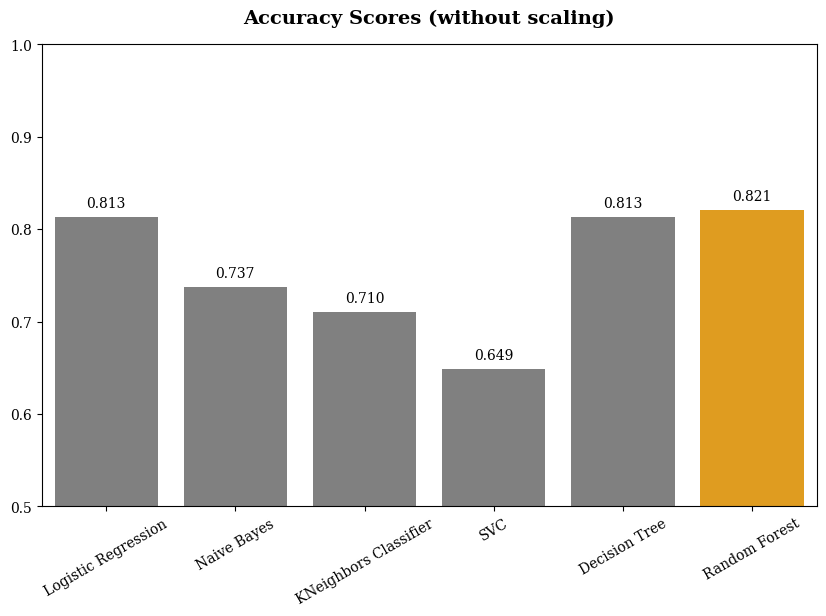

In [90]:
# plotting accuracy scores

plt.figure(figsize=(10,6))
plt.rcParams["font.family"] = "serif"

cols = ['grey' if (x < max(acc_score.values())) else 'orange' for x in acc_score.values()]
ax = sns.barplot(acc_score, x=acc_score.keys(), y=acc_score.values(), palette=cols)
ax.set_xticklabels(acc_score.keys(),rotation=30)
plt.ylim(0.5, 1.00)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax.set_title('Accuracy Scores (without scaling)', fontdict={'fontsize': 14, 'fontweight': 'semibold'}, pad=15)


Text(0.5, 1.0, 'Precision Scores (without scaling)')

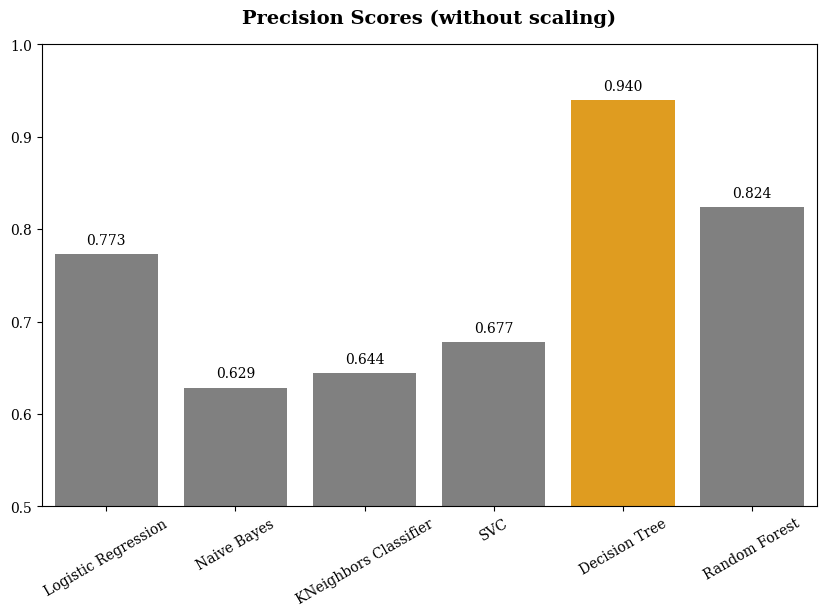

In [91]:
# plotting precision scores
plt.figure(figsize=(10,6))
plt.rcParams["font.family"] = "serif"
cols = ['grey' if (x < max(prec_score.values())) else 'orange' for x in prec_score.values()]
ax = sns.barplot(prec_score, x=prec_score.keys(), y=prec_score.values(), palette=cols)
ax.set_xticklabels(prec_score.keys(),rotation=30)
plt.ylim(0.5, 1.00)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_title('Precision Scores (without scaling)', fontdict={'fontsize': 14, 'fontweight': 'semibold'}, pad=15)

Text(0.5, 1.0, 'Recall Scores (without scaling)')

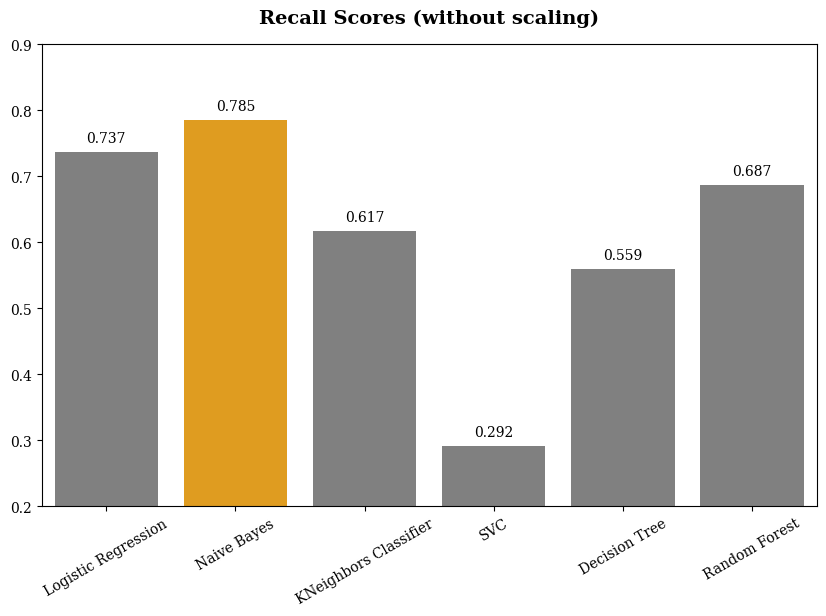

In [92]:
# plotting recall scores
plt.figure(figsize=(10,6))
plt.rcParams["font.family"] = "serif"
cols = ['grey' if (x < max(rec_score.values())) else 'orange' for x in rec_score.values()]
ax = sns.barplot(rec_score, x=rec_score.keys(), y=rec_score.values(), palette=cols)
ax.set_xticklabels(rec_score.keys(),rotation=30)
plt.ylim(0.2, 0.9)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_title('Recall Scores (without scaling)', fontdict={'fontsize': 14, 'fontweight': 'semibold'}, pad=15)

Text(0.5, 1.0, 'F1 Scores (without scaling)')

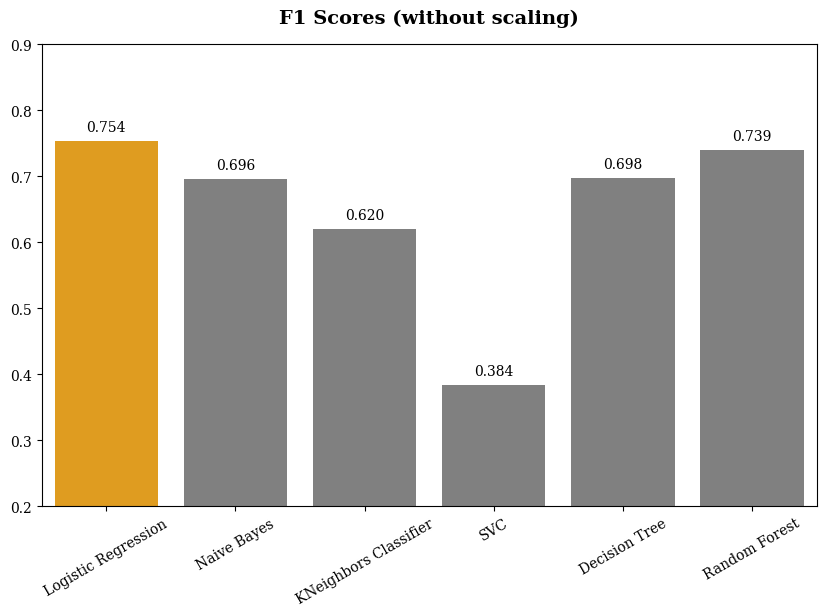

In [93]:
# plotting f1 scores
plt.figure(figsize=(10,6))
plt.rcParams["font.family"] = "serif"
cols = ['grey' if (x < max(f1.values())) else 'orange' for x in f1.values()]
ax = sns.barplot(f1, x=f1.keys(), y=f1.values(), palette=cols)
ax.set_xticklabels(f1.keys(),rotation=30)
plt.ylim(0.2, 0.9)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_title('F1 Scores (without scaling)', fontdict={'fontsize': 14, 'fontweight': 'semibold'}, pad=15)

### With Scaling

Text(0.5, 1.0, 'Accuracy Scores (with scaling)')

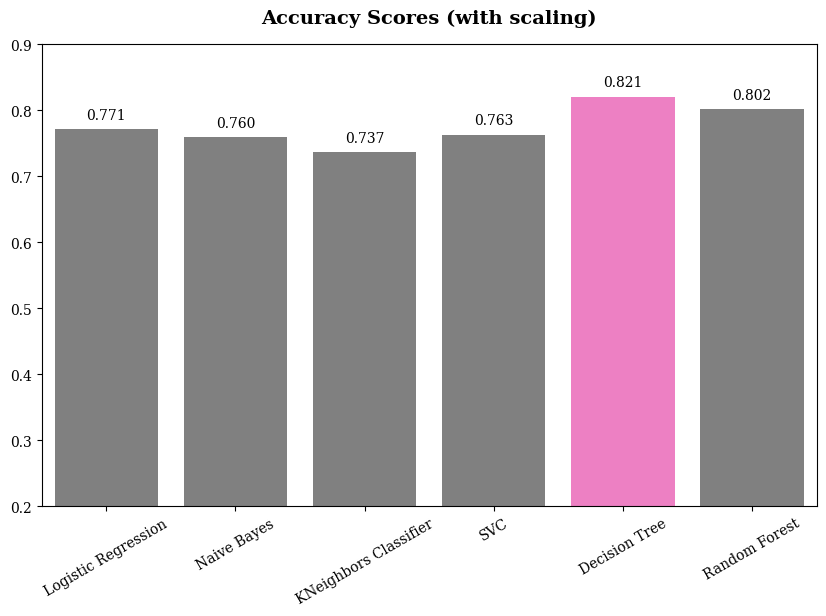

In [94]:
# plotting accuracy scores
plt.figure(figsize=(10,6))
plt.rcParams["font.family"] = "serif"
cols = ['grey' if (x < max(acc_score_scaled.values())) else '#FF6EC7' for x in acc_score_scaled.values()]
ax = sns.barplot(acc_score_scaled, x=acc_score_scaled.keys(), y=acc_score_scaled.values(), palette=cols)
ax.set_xticklabels(acc_score_scaled.keys(),rotation=30)
plt.ylim(0.2, 0.9)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_title('Accuracy Scores (with scaling)', fontdict={'fontsize': 14, 'fontweight': 'semibold'}, pad=15)

Text(0.5, 1.0, 'Precision Scores (with scaling)')

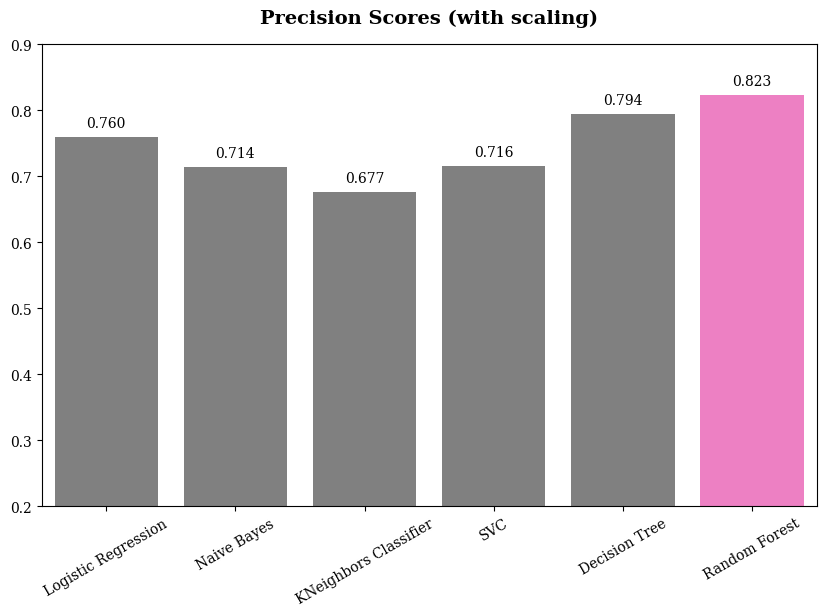

In [95]:
# plotting precision scores
plt.figure(figsize=(10,6))
plt.rcParams["font.family"] = "serif"
cols = ['grey' if (x < max(prec_score_scaled.values())) else '#FF6EC7' for x in prec_score_scaled.values()]
ax = sns.barplot(prec_score_scaled, x=prec_score_scaled.keys(), y=prec_score_scaled.values(), palette=cols)
ax.set_xticklabels(prec_score_scaled.keys(),rotation=30)
plt.ylim(0.2, 0.9)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_title('Precision Scores (with scaling)', fontdict={'fontsize': 14, 'fontweight': 'semibold'}, pad=15)

Text(0.5, 1.0, 'Recall Scores (with scaling)')

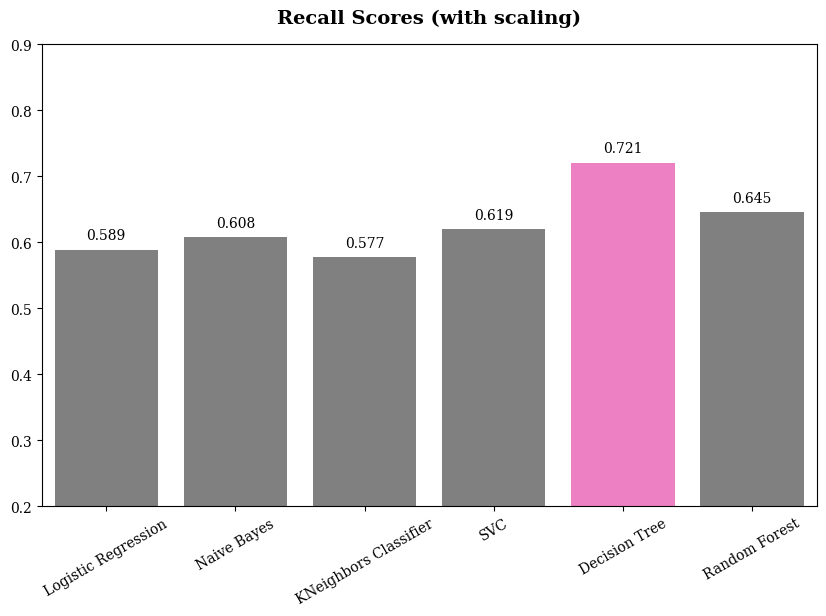

In [96]:
# plotting recall scores
plt.figure(figsize=(10,6))
plt.rcParams["font.family"] = "serif"
cols = ['grey' if (x < max(rec_score_scaled.values())) else '#FF6EC7' for x in rec_score_scaled.values()]
ax = sns.barplot(rec_score_scaled, x=rec_score_scaled.keys(), y=rec_score_scaled.values(), palette=cols)
ax.set_xticklabels(rec_score_scaled.keys(),rotation=30)
plt.ylim(0.2, 0.9)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_title('Recall Scores (with scaling)', fontdict={'fontsize': 14, 'fontweight': 'semibold'}, pad=15)

Text(0.5, 1.0, 'F1 Scores (with scaling)')

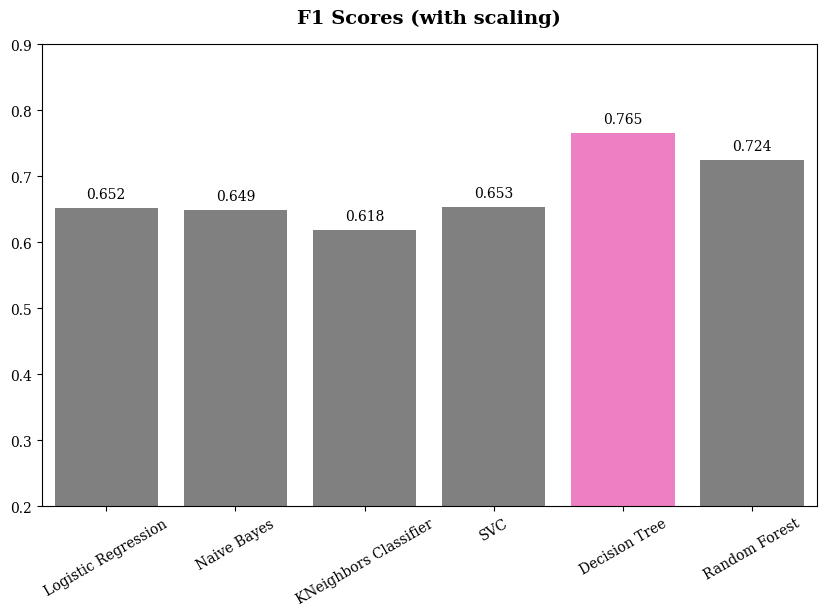

In [97]:
# plotting f1 scores
plt.figure(figsize=(10,6))
plt.rcParams["font.family"] = "serif"
cols = ['grey' if (x < max(f1_scaled.values())) else '#FF6EC7' for x in f1_scaled.values()]
ax = sns.barplot(f1_scaled, x=f1_scaled.keys(), y=f1_scaled.values(), palette=cols)
ax.set_xticklabels(f1_scaled.keys(),rotation=30)
plt.ylim(0.2, 0.9)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_title('F1 Scores (with scaling)', fontdict={'fontsize': 14, 'fontweight': 'semibold'}, pad=15)

### Best ever scores

In [ ]:
show_scores()

accuracy score: {'Logistic Regression': 0.782510885341074, 'Naive Bayes': 0.7634252539912918, 'KNeighbors Classifier': 0.6529027576197388, 'SVC': 0.6640783744557328, 'Decision Tree': 0.820754716981132, 'Random Forest': 0.8015965166908563},
precision score: {'Logistic Regression': 0.7429269814853339, 'Naive Bayes': 0.7040909090909091, 'KNeighbors Classifier': 0.618055278055278, 'SVC': 0.7112121212121212, 'Decision Tree': 0.7937851037851038, 'Random Forest': 0.8231154810102179},
recall score: {'Logistic Regression': 0.7038095238095237, 'Naive Bayes': 0.7128571428571429, 'KNeighbors Classifier': 0.39380952380952383, 'SVC': 0.27761904761904754, 'Decision Tree': 0.720952380952381, 'Random Forest': 0.6452380952380953},
f1 score: {'Logistic Regression': 0.7132467532467532, 'Naive Bayes': 0.7039789720107361, 'KNeighbors Classifier': 0.47411764705882353, 'SVC': 0.38939665471923535, 'Decision Tree': 0.7654229815620578, 'Random Forest': 0.7242469295410472}


In [ ]:
show_scores_scaled()

 SCALED SCORES:
accuracy score: {'Logistic Regression': 0.7634978229317853, 'Naive Bayes': 0.7597242380261248, 'KNeighbors Classifier': 0.759579100145138, 'Decision Tree': 0.820754716981132, 'Random Forest': 0.8015965166908563},
precision score: {'Logistic Regression': 0.7321860206070733, 'Naive Bayes': 0.7613997113997113, 'KNeighbors Classifier': 0.7595238095238095, 'Decision Tree': 0.7937851037851038, 'Random Forest': 0.8231154810102179},
recall score: {'Logistic Regression': 0.6547619047619048, 'Naive Bayes': 0.5666666666666667, 'KNeighbors Classifier': 0.5852380952380953, 'Decision Tree': 0.720952380952381, 'Random Forest': 0.6452380952380953},
f1 score: {'Logistic Regression': 0.6815090500552591, 'Naive Bayes': 0.6403741599335497, 'KNeighbors Classifier': 0.6499564459930314, 'Decision Tree': 0.7654229815620578, 'Random Forest': 0.7242469295410472}


In [ ]:
acc_best = {
    'Logistic Regression': 0.782510885341074,
    'Naive Bayes': 0.7634252539912918,
    'KNeighbors Classifier': 0.759579100145138,

}